# Medical Cost EDA Regression

![image.png](attachment:image.png)

## Import libraries

In [3]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Load the dataset

In [6]:
# laod the dataset
df =  pd.read_csv('./data/insurance.csv')

## Data analysis

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

A good day is when there is no "NaN"in the data :D Let's look at our data to understand something about it. Since we are primarily interested in the amount of costs see what posts are more correlated with charges. For a start, we will encode categorical features.

In [10]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

A few words about coding "region". In general, categorical variables with large variability are best encoded using OneHotEncoder and so on. But in this case, nothing will change, because there is no special order in which the regions would be listed. So I'm being very lazy only used the Label Encoder.

In [11]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<Axes: >

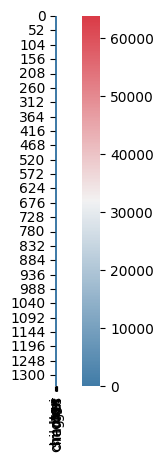

In [36]:
sns.heatmap(df, mask=np.zeros_like(df, dtype=np.bool_), cmap=sns.diverging_palette(240,10,as_cmap=True), square=True)

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

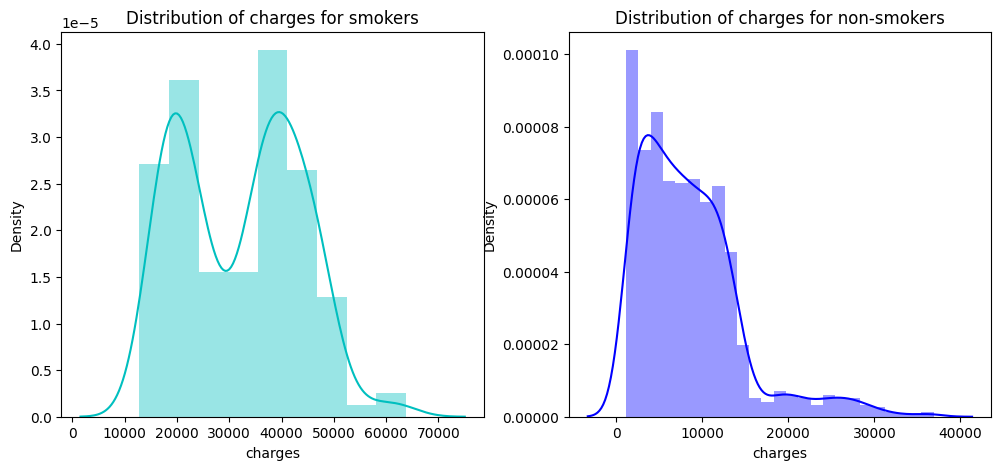

In [43]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

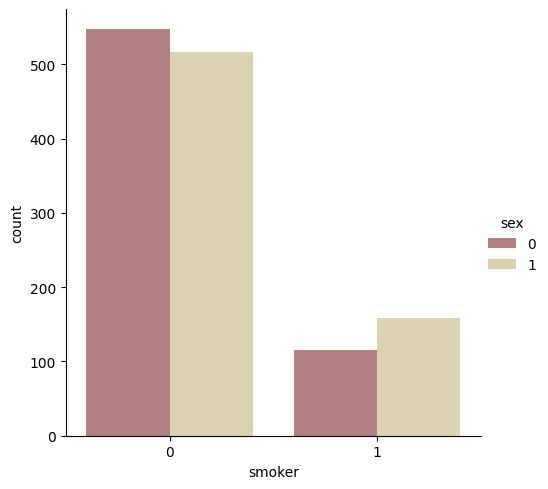

In [44]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)

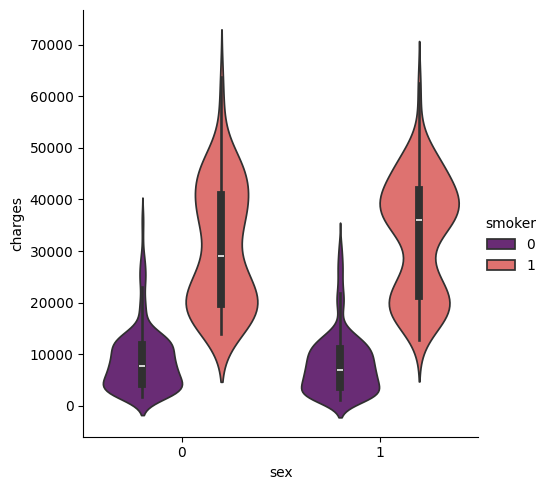

In [45]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = 'magma')

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

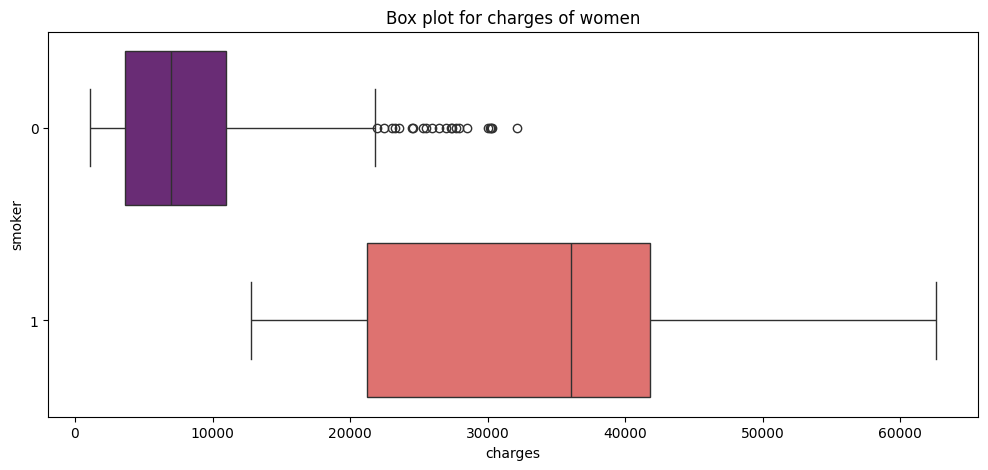

In [46]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = 'magma')

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

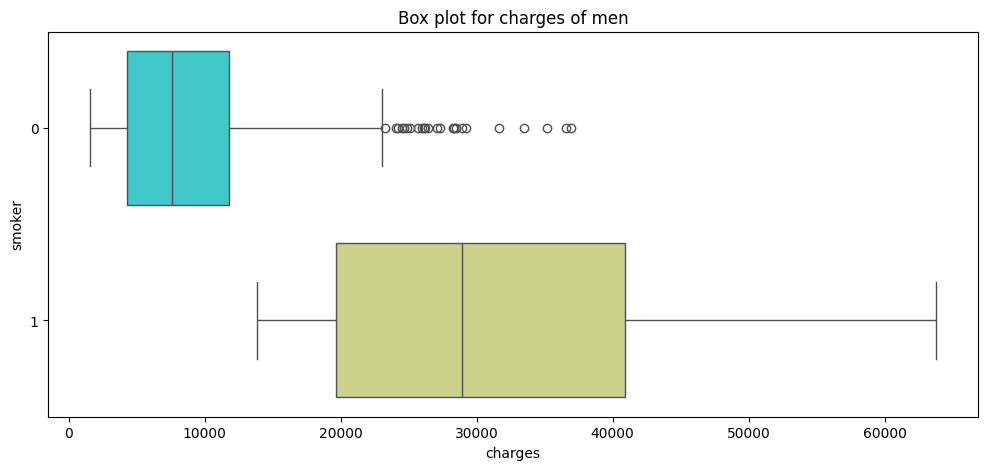

In [47]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h", palette = 'rainbow')

Now let's pay attention to the age of the patients. First, let's look at how age affects the cost of treatment, and also look at patients of what age more in our data set.

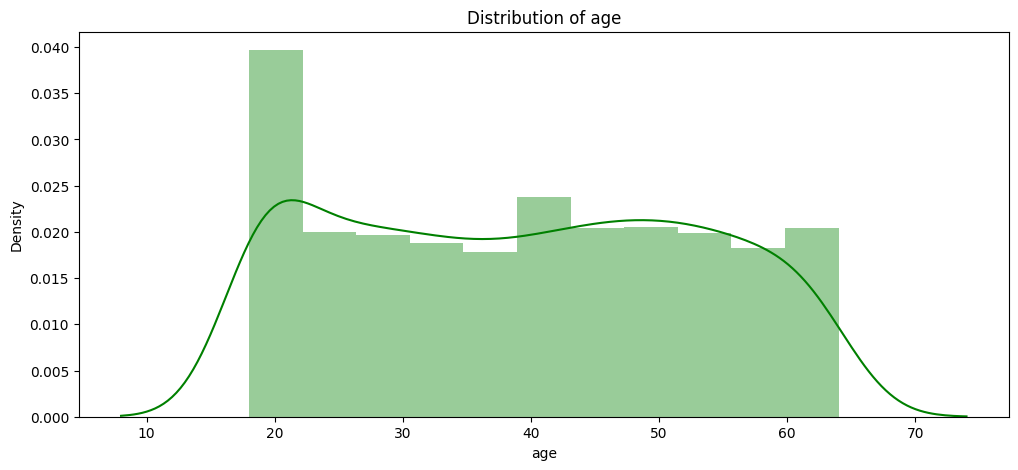

In [49]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'g')

We have patients under 20 in our data set. Im 18 years old. This is the minimum age of patients in our set. The maximum age is 64 years. My personal interest is whether there are smokers among patients 18 years.

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

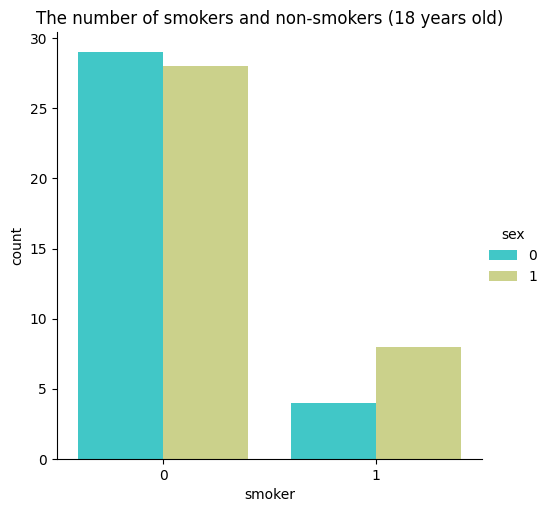

In [50]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

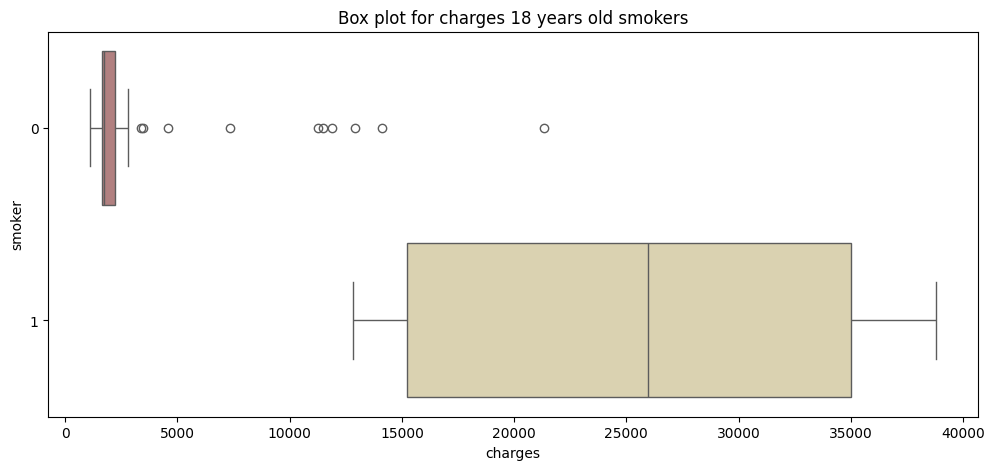

In [51]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'pink')

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

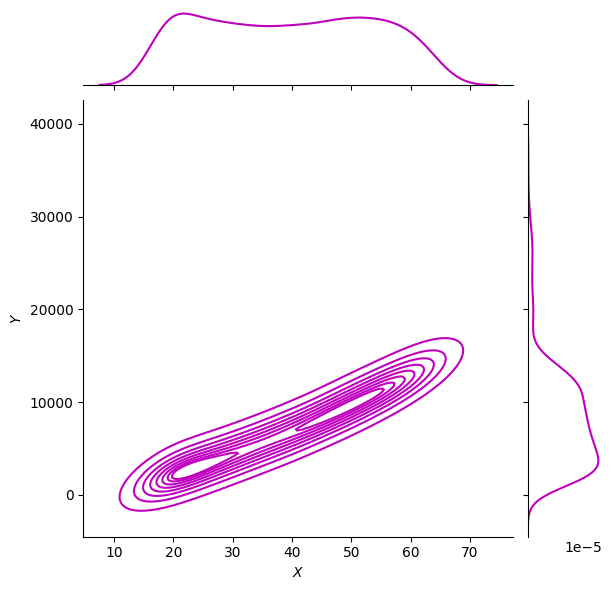

In [52]:
g = sns.jointplot(x="age", y="charges", data = df[(df.smoker == 0)],kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

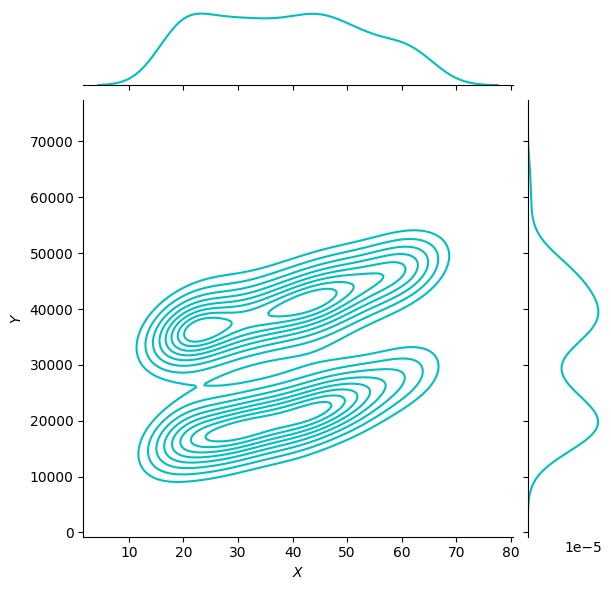

In [53]:
g = sns.jointplot(x="age", y="charges", data = df[(df.smoker == 1)],kind="kde", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

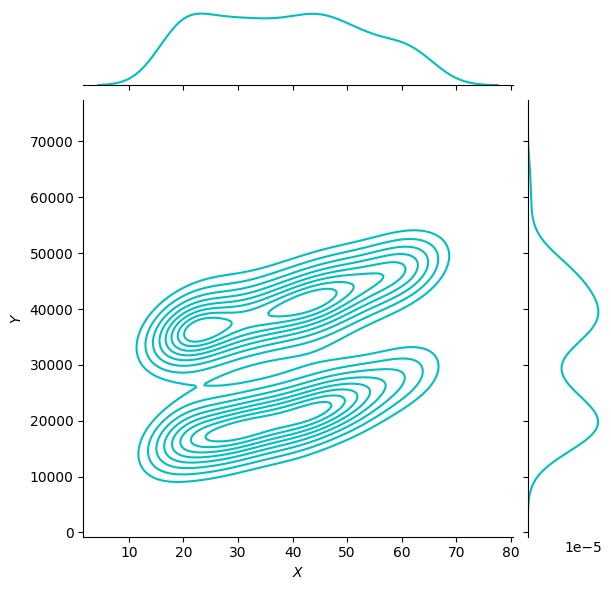

In [54]:
g = sns.jointplot(x="age", y="charges", data = df[(df.smoker == 1)],kind="kde", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

Text(0.5, 1.0, 'Smokers and non-smokers')

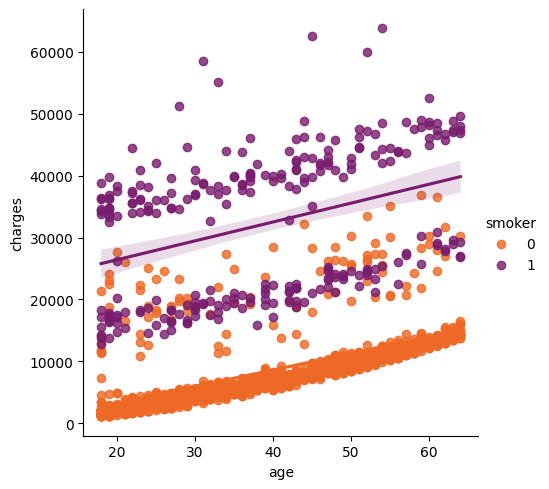

In [61]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

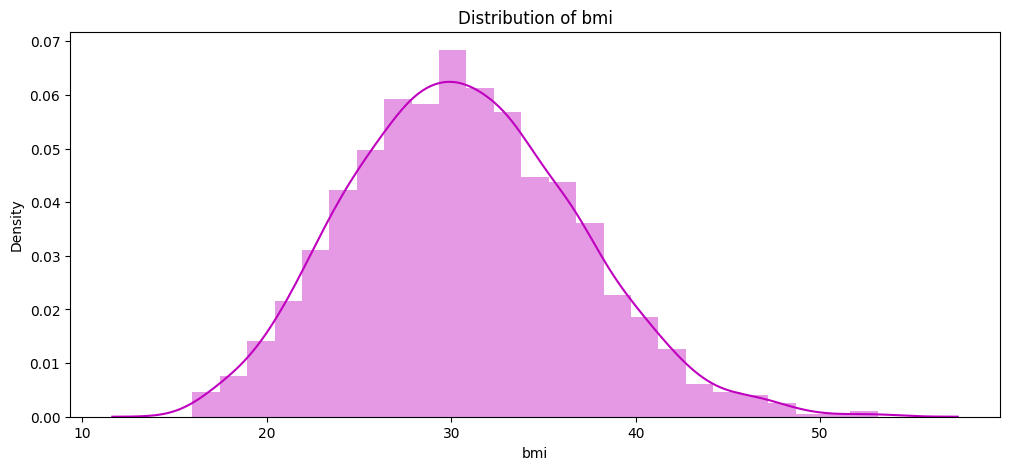

In [62]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df["bmi"], color = 'm')

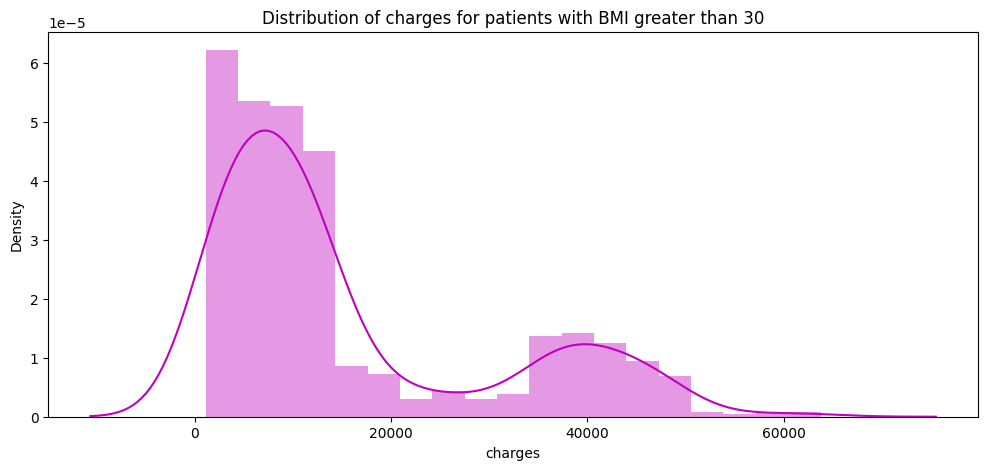

In [63]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'm')

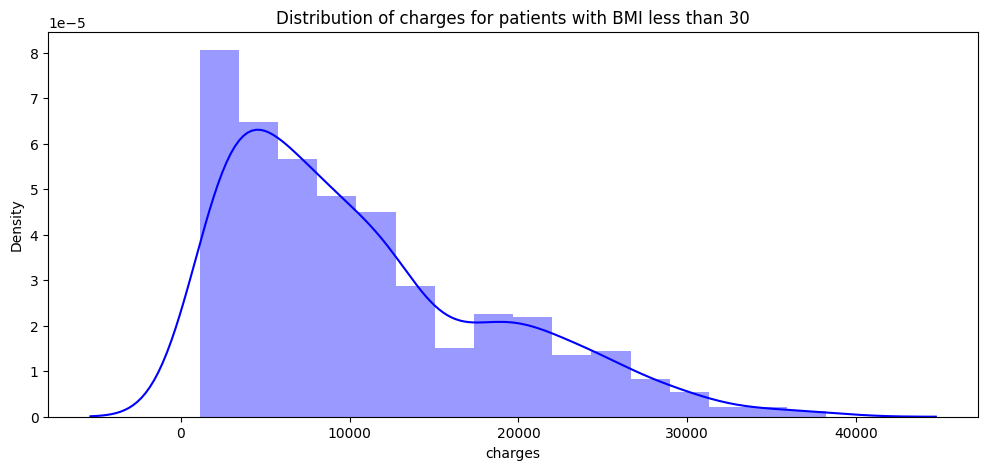

In [64]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b')

Text(0.5, 1.0, 'Distribution of bmi and charges')

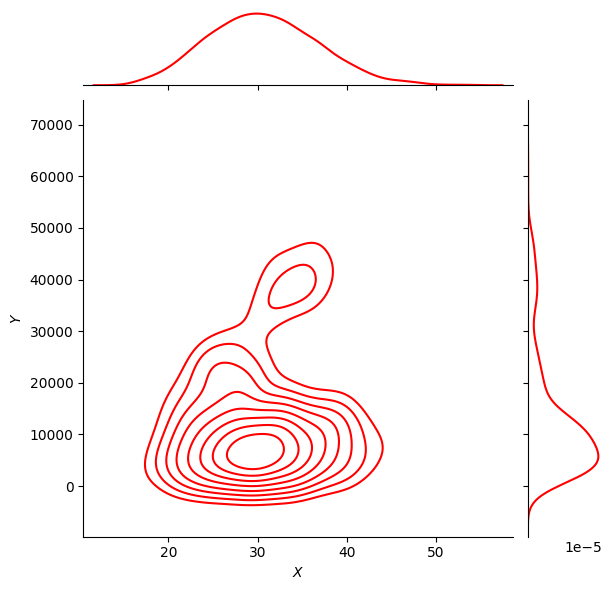

In [65]:
g = sns.jointplot(x="bmi", y="charges", data = df,kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

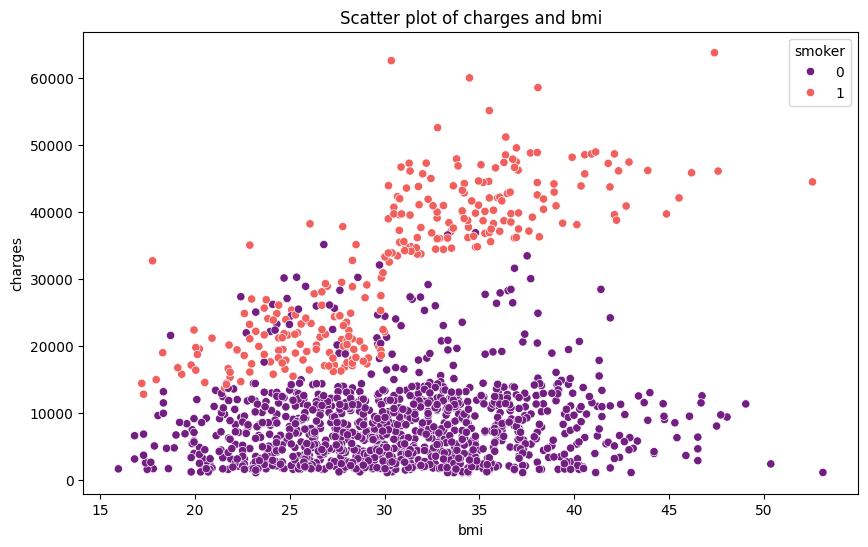

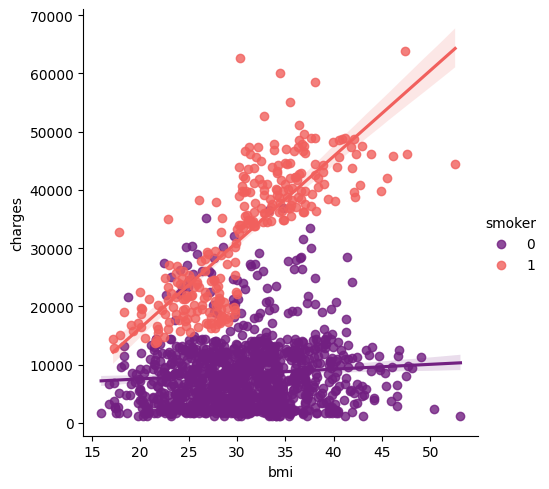

In [67]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma')

Let's pay attention to children. First, let's see how many children our patients have.

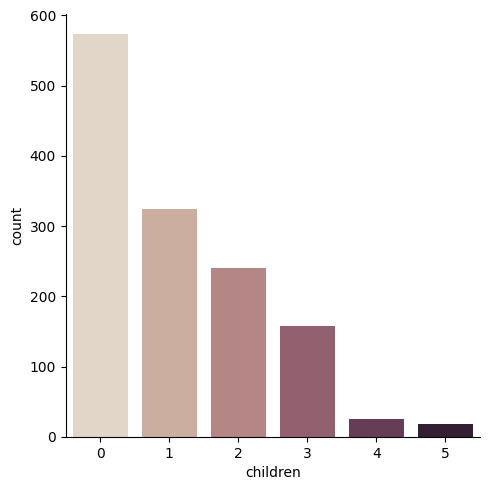

In [69]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=df)

Most patients do not have children. Perfectly that some have 5 children! Children are happiness:) I wonder if people who have children smoke.

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

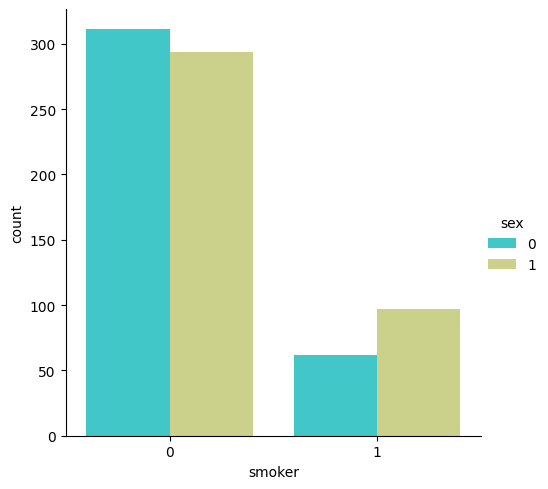

In [71]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=df[(df.children > 0)])
ax.set_title('Smokers and non-smokers who have childrens')

I have a few more ideas for exploring this dataset. I will soon implement them. And now we are going to predict the cost of treatment. Let's start with the usual linear regression.

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [73]:
x = df.drop(['charges'], axis = 1)
y = df.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7962732059725786


In [74]:
X = df.drop(['charges','region'], axis = 1)
Y = df.charges

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8849197344147237


In [81]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(criterion='squared_error')